In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load Lena image from local folder
print("Loading Lena image...")
img = cv2.imread('lena.png', cv2.IMREAD_COLOR)

Loading Lena image...



METHOD 1: USING BUILT-IN FUNCTIONS (OpenCV & NumPy)


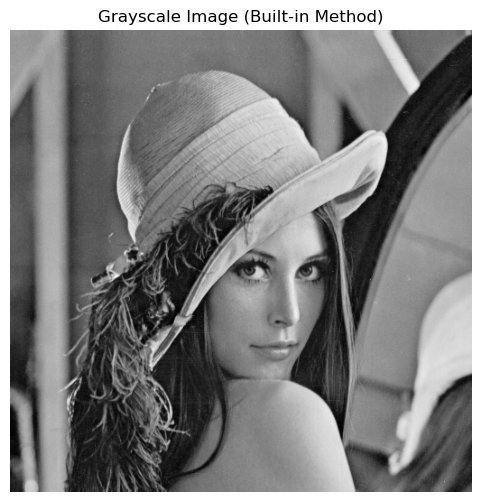

Image shape: (512, 512)


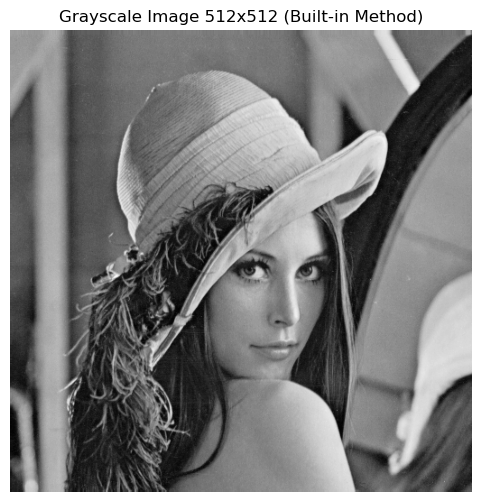


1) Average Pixel Value: 124.0486

2) Standard Deviation: 47.8556

3) Histogram (using cv2.calcHist):
   Sample values (first 10 bins):
   Bin 0: 0 pixels
   Bin 1: 0 pixels
   Bin 2: 0 pixels
   Bin 3: 0 pixels
   Bin 4: 0 pixels
   Bin 5: 0 pixels
   Bin 6: 0 pixels
   Bin 7: 0 pixels
   Bin 8: 0 pixels
   Bin 9: 0 pixels

4) Probability Distribution:
   Total pixels: 262144
   Sample probabilities (first 10 bins):
   P(intensity=0): 0.000000
   P(intensity=1): 0.000000
   P(intensity=2): 0.000000
   P(intensity=3): 0.000000
   P(intensity=4): 0.000000
   P(intensity=5): 0.000000
   P(intensity=6): 0.000000
   P(intensity=7): 0.000000
   P(intensity=8): 0.000000
   P(intensity=9): 0.000000

5) Kth Moments about the mean:
   3th moment: -9.0990e+03
   4th moment: 1.1303e+07
   5th moment: -2.2166e+07
   6th moment: 6.8640e+10
   7th moment: 2.4100e+11


In [3]:
print("\n" + "="*80)
print("METHOD 1: USING BUILT-IN FUNCTIONS (OpenCV & NumPy)")
print("="*80)

# Convert to grayscale using built-in
gray_img_builtin = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_img_builtin, cmap='gray')
plt.title('Grayscale Image (Built-in Method)')
plt.axis('off')
plt.show()

# Resize to 512x512 using built-in
gray_img_512_builtin = cv2.resize(gray_img_builtin, (512, 512))

print(f"Image shape: {gray_img_512_builtin.shape}")

# Display resized grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_img_512_builtin, cmap='gray')
plt.title('Grayscale Image 512x512 (Built-in Method)')
plt.axis('off')
plt.show()

# 1) Average using built-in
avg_builtin = np.mean(gray_img_512_builtin)
print(f"\n1) Average Pixel Value: {avg_builtin:.4f}")

# 2) Standard deviation using built-in
std_builtin = np.std(gray_img_512_builtin)
print(f"\n2) Standard Deviation: {std_builtin:.4f}")

# 3) Histogram using built-in
hist_builtin = cv2.calcHist([gray_img_512_builtin], [0], None, [256], [0, 256])
hist_builtin = hist_builtin.flatten()
print(f"\n3) Histogram (using cv2.calcHist):")
print(f"   Sample values (first 10 bins):")
for i in range(10):
    print(f"   Bin {i}: {int(hist_builtin[i])} pixels")

# 4) Probability distribution using built-in
total_pixels_builtin = gray_img_512_builtin.size
prob_dist_builtin = hist_builtin / total_pixels_builtin
print(f"\n4) Probability Distribution:")
print(f"   Total pixels: {total_pixels_builtin}")
print(f"   Sample probabilities (first 10 bins):")
for i in range(10):
    print(f"   P(intensity={i}): {prob_dist_builtin[i]:.6f}")

# 5) Kth moments using built-in
print(f"\n5) Kth Moments about the mean:")
mean_builtin = avg_builtin
for k in [3, 4, 5, 6, 7]:
    moment_builtin = np.mean((gray_img_512_builtin - mean_builtin) ** k)
    print(f"   {k}th moment: {moment_builtin:.4e}")



METHOD 2: WITHOUT BUILT-IN FUNCTIONS (Manual Implementation)


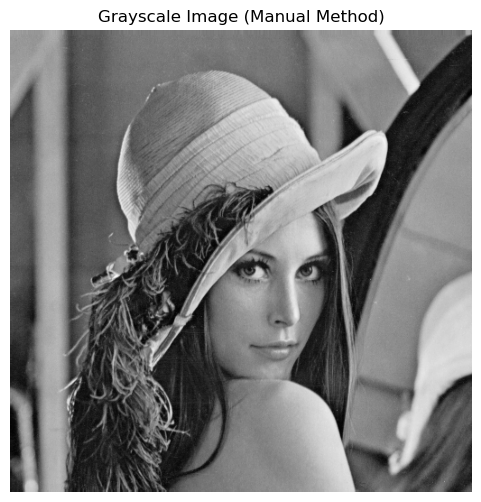

Image shape: (512, 512)


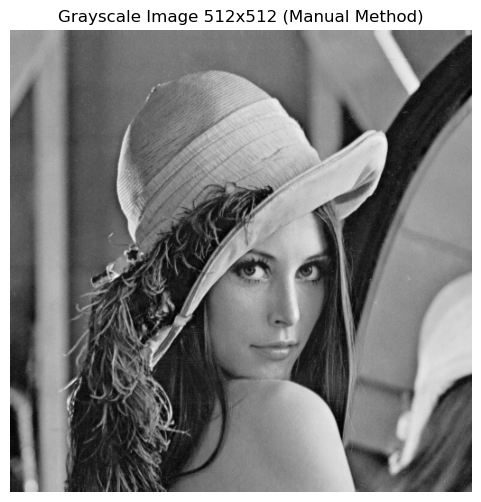


1) Average Pixel Value: 123.5468

2) Standard Deviation: 47.8548

3) Histogram (manual counting):
   Sample values (first 10 bins):
   Bin 0: 0 pixels
   Bin 1: 0 pixels
   Bin 2: 0 pixels
   Bin 3: 0 pixels
   Bin 4: 0 pixels
   Bin 5: 0 pixels
   Bin 6: 0 pixels
   Bin 7: 0 pixels
   Bin 8: 0 pixels
   Bin 9: 0 pixels

4) Probability Distribution:
   Total pixels: 262144
   Sample probabilities (first 10 bins):
   P(intensity=0): 0.000000
   P(intensity=1): 0.000000
   P(intensity=2): 0.000000
   P(intensity=3): 0.000000
   P(intensity=4): 0.000000
   P(intensity=5): 0.000000
   P(intensity=6): 0.000000
   P(intensity=7): 0.000000
   P(intensity=8): 0.000000
   P(intensity=9): 0.000000

5) Kth Moments about the mean:
   3th moment: -9.0948e+03
   4th moment: 1.1302e+07
   5th moment: -2.2129e+07
   6th moment: 6.8624e+10
   7th moment: 2.4124e+11


In [4]:
print("\n\n" + "="*80)
print("METHOD 2: WITHOUT BUILT-IN FUNCTIONS (Manual Implementation)")
print("="*80)

# Convert to grayscale manually
# Formula: Gray = 0.299*R + 0.587*G + 0.114*B
rows, cols, channels = img.shape
gray_img_manual = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        b, g, r = img[i, j]
        gray_img_manual[i, j] = int(0.299 * r + 0.587 * g + 0.114 * b)

# Display grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_img_manual, cmap='gray')
plt.title('Grayscale Image (Manual Method)')
plt.axis('off')
plt.show()

# Resize to 512x512 manually using nearest neighbor interpolation
target_size = 512
gray_img_512_manual = np.zeros((target_size, target_size), dtype=np.uint8)
row_ratio = rows / target_size
col_ratio = cols / target_size

for i in range(target_size):
    for j in range(target_size):
        src_i = int(i * row_ratio)
        src_j = int(j * col_ratio)
        gray_img_512_manual[i, j] = gray_img_manual[src_i, src_j]

print(f"Image shape: {gray_img_512_manual.shape}")

# Display resized grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_img_512_manual, cmap='gray')
plt.title('Grayscale Image 512x512 (Manual Method)')
plt.axis('off')
plt.show()

# 1) Average manually
pixel_sum = 0.0  # Use float to avoid overflow
total_pixels_manual = target_size * target_size
for i in range(target_size):
    for j in range(target_size):
        pixel_sum += float(gray_img_512_manual[i, j])
avg_manual = pixel_sum / total_pixels_manual
print(f"\n1) Average Pixel Value: {avg_manual:.4f}")

# 2) Standard deviation manually
variance_sum = 0.0  # Use float to avoid overflow
for i in range(target_size):
    for j in range(target_size):
        variance_sum += (float(gray_img_512_manual[i, j]) - avg_manual) ** 2
variance = variance_sum / total_pixels_manual
std_manual = variance ** 0.5
print(f"\n2) Standard Deviation: {std_manual:.4f}")

# 3) Histogram manually
hist_manual = [0] * 256
for i in range(target_size):
    for j in range(target_size):
        intensity = gray_img_512_manual[i, j]
        hist_manual[intensity] += 1

print(f"\n3) Histogram (manual counting):")
print(f"   Sample values (first 10 bins):")
for i in range(10):
    print(f"   Bin {i}: {hist_manual[i]} pixels")

# 4) Probability distribution manually
prob_dist_manual = [0.0] * 256
for i in range(256):
    prob_dist_manual[i] = hist_manual[i] / total_pixels_manual

print(f"\n4) Probability Distribution:")
print(f"   Total pixels: {total_pixels_manual}")
print(f"   Sample probabilities (first 10 bins):")
for i in range(10):
    print(f"   P(intensity={i}): {prob_dist_manual[i]:.6f}")

# 5) Kth moments manually
print(f"\n5) Kth Moments about the mean:")
for k in [3, 4, 5, 6, 7]:
    moment_sum = 0.0  # Use float to avoid overflow
    for i in range(target_size):
        for j in range(target_size):
            moment_sum += (float(gray_img_512_manual[i, j]) - avg_manual) ** k
    moment_manual = moment_sum / total_pixels_manual
    print(f"   {k}th moment: {moment_manual:.4e}")



COMPARISON OF RESULTS
Measure                        Built-in             Manual               Difference
--------------------------------------------------------------------------------
Average                        124.0486             123.5468             0.501804
Standard Deviation             47.8556              47.8548              0.000835
Histogram Total Diff           -                    -                    8712
3th moment                       -9.0990e+03          -9.0948e+03          4.1880e+00
4th moment                       1.1303e+07           1.1302e+07           1.4515e+03
5th moment                       -2.2166e+07          -2.2129e+07          3.6370e+04
6th moment                       6.8640e+10           6.8624e+10           1.5618e+07
7th moment                       2.4100e+11           2.4124e+11           2.4747e+08

Visualization saved as 'image_statistics_comparison.png'


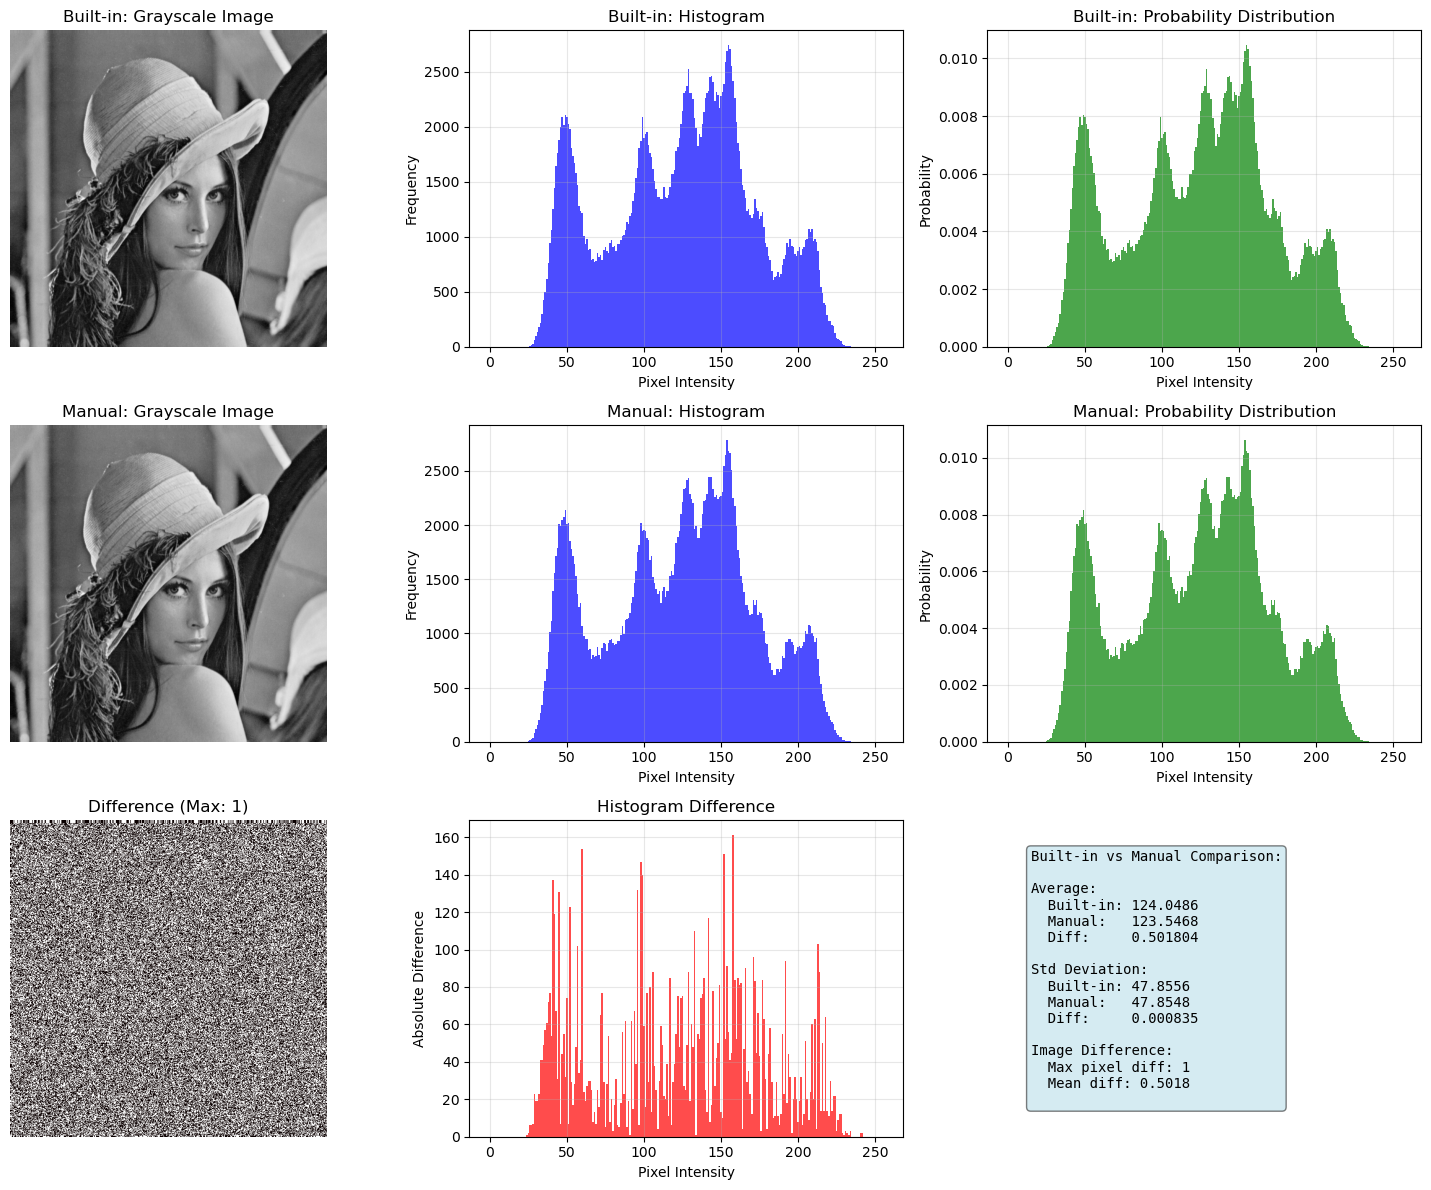


Analysis complete!


In [5]:
# Comparison
print("\n\n" + "="*80)
print("COMPARISON OF RESULTS")
print("="*80)
print(f"{'Measure':<30} {'Built-in':<20} {'Manual':<20} {'Difference'}")
print("-"*80)
print(f"{'Average':<30} {avg_builtin:<20.4f} {avg_manual:<20.4f} {abs(avg_builtin-avg_manual):.6f}")
print(f"{'Standard Deviation':<30} {std_builtin:<20.4f} {std_manual:<20.4f} {abs(std_builtin-std_manual):.6f}")

# Check histogram differences
hist_diff = sum(abs(hist_builtin[i] - hist_manual[i]) for i in range(256))
print(f"{'Histogram Total Diff':<30} {'-':<20} {'-':<20} {hist_diff:.0f}")

for k in [3, 4, 5, 6, 7]:
    moment_bi = np.mean((gray_img_512_builtin - mean_builtin) ** k)
    moment_sum = 0.0  # Use float to avoid overflow
    for i in range(target_size):
        for j in range(target_size):
            moment_sum += (float(gray_img_512_manual[i, j]) - avg_manual) ** k
    moment_ma = moment_sum / total_pixels_manual
    print(f"{k}th moment{'':<22} {moment_bi:<20.4e} {moment_ma:<20.4e} {abs(moment_bi-moment_ma):.4e}")


# Visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Built-in results
axes[0, 0].imshow(gray_img_512_builtin, cmap='gray')
axes[0, 0].set_title('Built-in: Grayscale Image')
axes[0, 0].axis('off')

axes[0, 1].bar(range(256), hist_builtin, width=1, color='blue', alpha=0.7)
axes[0, 1].set_title('Built-in: Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].bar(range(256), prob_dist_builtin, width=1, color='green', alpha=0.7)
axes[0, 2].set_title('Built-in: Probability Distribution')
axes[0, 2].set_xlabel('Pixel Intensity')
axes[0, 2].set_ylabel('Probability')
axes[0, 2].grid(True, alpha=0.3)

# Manual results
axes[1, 0].imshow(gray_img_512_manual, cmap='gray')
axes[1, 0].set_title('Manual: Grayscale Image')
axes[1, 0].axis('off')

axes[1, 1].bar(range(256), hist_manual, width=1, color='blue', alpha=0.7)
axes[1, 1].set_title('Manual: Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].bar(range(256), prob_dist_manual, width=1, color='green', alpha=0.7)
axes[1, 2].set_title('Manual: Probability Distribution')
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Probability')
axes[1, 2].grid(True, alpha=0.3)

# Difference visualization
diff_img = np.abs(gray_img_512_builtin.astype(int) - gray_img_512_manual.astype(int))
axes[2, 0].imshow(diff_img, cmap='hot')
axes[2, 0].set_title(f'Difference (Max: {np.max(diff_img)})')
axes[2, 0].axis('off')

hist_diff_array = [abs(hist_builtin[i] - hist_manual[i]) for i in range(256)]
axes[2, 1].bar(range(256), hist_diff_array, width=1, color='red', alpha=0.7)
axes[2, 1].set_title('Histogram Difference')
axes[2, 1].set_xlabel('Pixel Intensity')
axes[2, 1].set_ylabel('Absolute Difference')
axes[2, 1].grid(True, alpha=0.3)

# Statistical summary
stats_text = f"""Built-in vs Manual Comparison:

Average:
  Built-in: {avg_builtin:.4f}
  Manual:   {avg_manual:.4f}
  Diff:     {abs(avg_builtin-avg_manual):.6f}

Std Deviation:
  Built-in: {std_builtin:.4f}
  Manual:   {std_manual:.4f}
  Diff:     {abs(std_builtin-std_manual):.6f}

Image Difference:
  Max pixel diff: {np.max(diff_img)}
  Mean diff: {np.mean(diff_img):.4f}
"""
axes[2, 2].text(0.1, 0.5, stats_text, fontsize=10,
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[2, 2].axis('off')

plt.tight_layout()
plt.savefig('image_statistics_comparison.png', dpi=150, bbox_inches='tight')
print("\nVisualization saved as 'image_statistics_comparison.png'")
plt.show()

print("\n" + "="*80)
print("Analysis complete!")
print("="*80)